### Importing Lib

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Creating Dataset

In [31]:
dataset = pd.read_csv("Mall_Customers.csv")
X = dataset.iloc[ : , [3,4] ].values # we will take the income(3) and spent(4) col only to see the cluster

### Elbow Method --> number of clusters

c:\Users\abhis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\abhis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\abhis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\abhis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

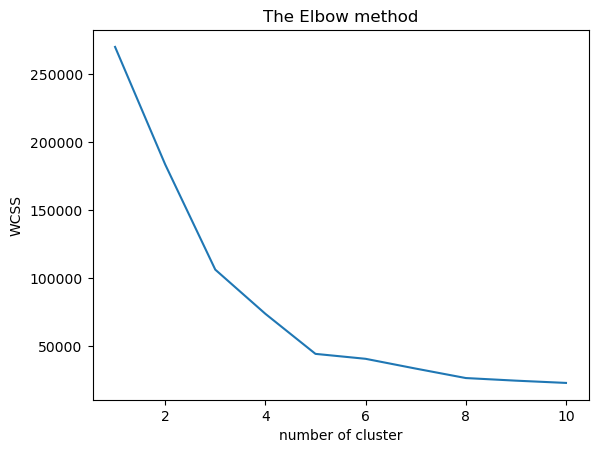

In [32]:
from sklearn.cluster import KMeans
# We will try the cluster till 10 cluster till it saturates --> hence we will use the loop
# Like we have done in theory -- making the table 
wcss = [] # list to store the values
for i in range(1,11,1): 
    #find the centre of the cluster and save in the list
    kmeans = KMeans( n_clusters= i , random_state=42 ,init= 'k-means++') #init --> to avoid the trap
    kmeans.fit(X) # training the dataset with selected col
    wcss.append(kmeans.inertia_) # adding the answer in the list

#plot the list data 
plt.plot(range(1,11) , wcss)
plt.title("The Elbow method")
plt.xlabel("number of cluster")
plt.ylabel("WCSS")
plt.show()   

### Training the Model

In [33]:
# By the above graph we can see that when the cluster number is 5 it almost saturates
# also we can say that we can have the 5 group of people to seperate the whole data
kmeans = KMeans( n_clusters= 5 , random_state=42 ,init= 'k-means++') 
y_kmeans = kmeans.fit_predict(X)  # this will returns the dependent variable

c:\Users\abhis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [34]:
print(y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


### Visualise the Result

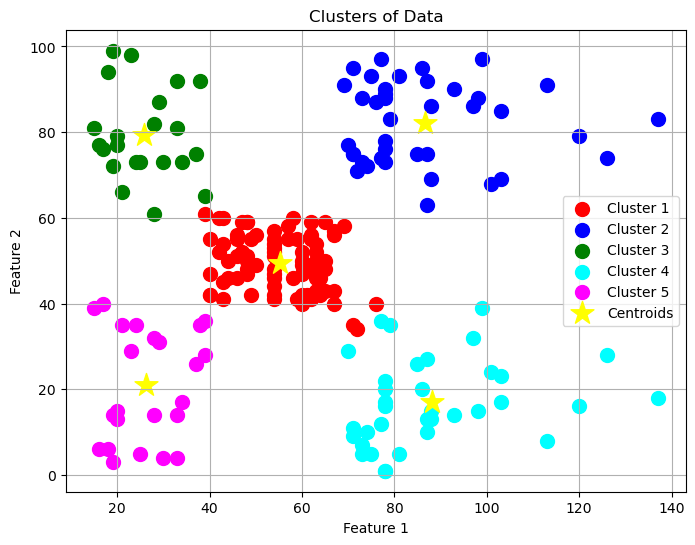

In [ ]:
# Plot the clusters
plt.figure(figsize=(8,6))
# Plot each cluster separately with different colors
# X[y_kmeans == i, 0] → x-coordinates of data points in cluster i
# X[y_kmeans == i, 1] → y-coordinates of data points in cluster i
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=300, c='yellow', label='Centroids', marker='*')

plt.title('Clusters of Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend() # Show legend to identify each cluster
plt.grid(True)
plt.show()
